- https://qiita.com/sasayabaku/items/b7872a3b8acc7d6261bf

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import LSTM
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def sin(x, T=100):
    return np.sin(2.0 * np.pi * x / T)

# sin波にノイズを付与する
def toy_problem(T=100, ampl=0.05):
    x = np.arange(0, 2 * T + 1)
    noise = ampl * np.random.uniform(low=-1.0, high=1.0, size=len(x))
    return sin(x) + noise

f = toy_problem()
print(f.shape)
plt.figure(figsize=(6,2));plt.plot(f);plt.show()

Using TensorFlow backend.


(201,)


<Figure size 600x200 with 1 Axes>

- 201フレームのうち、25フレームを一つの学習データとする。
- 少しずつずらしながら25フレームを切り取ることで学習データをたくさん用意する。
- 今回は1フレームずつずらしながら切り取っているので、全176個のデータができる。

In [2]:
def make_dataset(low_data, n_prev=100):

    data, target = [], []
    maxlen = 25

    for i in range(len(low_data)-maxlen):
        data.append(low_data[i:i + maxlen]) # x (25フレーム切り取ってくる)
        target.append(low_data[i + maxlen]) # y (xの1フレーム先)

    re_data = np.array(data).reshape(len(data), maxlen, 1)
    re_target = np.array(target).reshape(len(data), 1)

    return re_data, re_target


#g -> 学習データ，h -> 学習ラベル
g, h = make_dataset(f)
print(g.shape, h.shape)

(176, 25, 1) (176, 1)


In [3]:
length_of_sequence = g.shape[1] # 25
in_out_neurons = 1
n_hidden = 8

model = Sequential()
model.add(LSTM(n_hidden, batch_input_shape=(None, length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(lr=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 8)                 320       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
_________________________________________________________________
activation_1 (Activation)    (None, 1)                 0         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


In [7]:
early_stopping = EarlyStopping(monitor='val_loss', mode='auto', patience=100)
model.fit(g, h,
          batch_size=300,
          epochs=1000,
          validation_split=0.1,
          callbacks=[early_stopping]
          )

Train on 158 samples, validate on 18 samples
Epoch 1/1000
158/158 [==============================] - 0s 168us/step - loss: 0.0626 - val_loss: 0.0922
Epoch 2/1000
158/158 [==============================] - 0s 139us/step - loss: 0.0621 - val_loss: 0.0917
Epoch 3/1000
158/158 [==============================] - 0s 162us/step - loss: 0.0615 - val_loss: 0.0912
Epoch 4/1000
158/158 [==============================] - 0s 135us/step - loss: 0.0610 - val_loss: 0.0906
Epoch 5/1000
158/158 [==============================] - 0s 142us/step - loss: 0.0604 - val_loss: 0.0901
Epoch 6/1000
158/158 [==============================] - 0s 162us/step - loss: 0.0599 - val_loss: 0.0896
Epoch 7/1000
158/158 [==============================] - 0s 135us/step - loss: 0.0593 - val_loss: 0.0890
Epoch 8/1000
158/158 [==============================] - 0s 138us/step - loss: 0.0588 - val_loss: 0.0885
Epoch 9/1000
158/158 [==============================] - 0s 164us/step - loss: 0.0583 - val_loss: 0.0880
Epoch 10/1000
158/1

Epoch 79/1000
158/158 [==============================] - 0s 185us/step - loss: 0.0284 - val_loss: 0.0467
Epoch 80/1000
158/158 [==============================] - 0s 173us/step - loss: 0.0281 - val_loss: 0.0461
Epoch 81/1000
158/158 [==============================] - 0s 149us/step - loss: 0.0277 - val_loss: 0.0455
Epoch 82/1000
158/158 [==============================] - 0s 140us/step - loss: 0.0274 - val_loss: 0.0448
Epoch 83/1000
158/158 [==============================] - 0s 155us/step - loss: 0.0271 - val_loss: 0.0442
Epoch 84/1000
158/158 [==============================] - 0s 162us/step - loss: 0.0267 - val_loss: 0.0436
Epoch 85/1000
158/158 [==============================] - 0s 163us/step - loss: 0.0264 - val_loss: 0.0430
Epoch 86/1000
158/158 [==============================] - 0s 179us/step - loss: 0.0261 - val_loss: 0.0423
Epoch 87/1000
158/158 [==============================] - 0s 126us/step - loss: 0.0258 - val_loss: 0.0417
Epoch 88/1000
158/158 [==============================] 

Epoch 157/1000
158/158 [==============================] - 0s 155us/step - loss: 0.0119 - val_loss: 0.0123
Epoch 158/1000
158/158 [==============================] - 0s 185us/step - loss: 0.0118 - val_loss: 0.0121
Epoch 159/1000
158/158 [==============================] - 0s 194us/step - loss: 0.0117 - val_loss: 0.0119
Epoch 160/1000
158/158 [==============================] - 0s 152us/step - loss: 0.0116 - val_loss: 0.0117
Epoch 161/1000
158/158 [==============================] - 0s 165us/step - loss: 0.0115 - val_loss: 0.0116
Epoch 162/1000
158/158 [==============================] - 0s 141us/step - loss: 0.0114 - val_loss: 0.0114
Epoch 163/1000
158/158 [==============================] - 0s 150us/step - loss: 0.0113 - val_loss: 0.0112
Epoch 164/1000
158/158 [==============================] - 0s 129us/step - loss: 0.0112 - val_loss: 0.0111
Epoch 165/1000
158/158 [==============================] - 0s 147us/step - loss: 0.0111 - val_loss: 0.0109
Epoch 166/1000
158/158 [======================

Epoch 235/1000
158/158 [==============================] - 0s 166us/step - loss: 0.0064 - val_loss: 0.0050
Epoch 236/1000
158/158 [==============================] - 0s 166us/step - loss: 0.0064 - val_loss: 0.0050
Epoch 237/1000
158/158 [==============================] - 0s 139us/step - loss: 0.0063 - val_loss: 0.0049
Epoch 238/1000
158/158 [==============================] - 0s 140us/step - loss: 0.0063 - val_loss: 0.0049
Epoch 239/1000
158/158 [==============================] - 0s 171us/step - loss: 0.0062 - val_loss: 0.0048
Epoch 240/1000
158/158 [==============================] - 0s 147us/step - loss: 0.0062 - val_loss: 0.0048
Epoch 241/1000
158/158 [==============================] - 0s 133us/step - loss: 0.0062 - val_loss: 0.0048
Epoch 242/1000
158/158 [==============================] - 0s 153us/step - loss: 0.0061 - val_loss: 0.0047
Epoch 243/1000
158/158 [==============================] - 0s 138us/step - loss: 0.0061 - val_loss: 0.0047
Epoch 244/1000
158/158 [======================

Epoch 313/1000
158/158 [==============================] - 0s 116us/step - loss: 0.0039 - val_loss: 0.0030
Epoch 314/1000
158/158 [==============================] - 0s 141us/step - loss: 0.0039 - val_loss: 0.0030
Epoch 315/1000
158/158 [==============================] - 0s 167us/step - loss: 0.0039 - val_loss: 0.0030
Epoch 316/1000
158/158 [==============================] - 0s 158us/step - loss: 0.0038 - val_loss: 0.0030
Epoch 317/1000
158/158 [==============================] - 0s 186us/step - loss: 0.0038 - val_loss: 0.0030
Epoch 318/1000
158/158 [==============================] - 0s 181us/step - loss: 0.0038 - val_loss: 0.0029
Epoch 319/1000
158/158 [==============================] - 0s 128us/step - loss: 0.0038 - val_loss: 0.0029
Epoch 320/1000
158/158 [==============================] - 0s 158us/step - loss: 0.0038 - val_loss: 0.0029
Epoch 321/1000
158/158 [==============================] - 0s 145us/step - loss: 0.0037 - val_loss: 0.0029
Epoch 322/1000
158/158 [======================

Epoch 391/1000
158/158 [==============================] - 0s 169us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 392/1000
158/158 [==============================] - 0s 151us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 393/1000
158/158 [==============================] - 0s 160us/step - loss: 0.0026 - val_loss: 0.0023
Epoch 394/1000
158/158 [==============================] - 0s 130us/step - loss: 0.0026 - val_loss: 0.0022
Epoch 395/1000
158/158 [==============================] - 0s 167us/step - loss: 0.0026 - val_loss: 0.0022
Epoch 396/1000
158/158 [==============================] - 0s 126us/step - loss: 0.0026 - val_loss: 0.0022
Epoch 397/1000
158/158 [==============================] - 0s 143us/step - loss: 0.0026 - val_loss: 0.0022
Epoch 398/1000
158/158 [==============================] - 0s 146us/step - loss: 0.0026 - val_loss: 0.0022
Epoch 399/1000
158/158 [==============================] - 0s 136us/step - loss: 0.0025 - val_loss: 0.0022
Epoch 400/1000
158/158 [======================

Epoch 469/1000
158/158 [==============================] - 0s 131us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 470/1000
158/158 [==============================] - 0s 173us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 471/1000
158/158 [==============================] - 0s 134us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 472/1000
158/158 [==============================] - 0s 135us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 473/1000
158/158 [==============================] - 0s 151us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 474/1000
158/158 [==============================] - 0s 147us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 475/1000
158/158 [==============================] - 0s 167us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 476/1000
158/158 [==============================] - 0s 163us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 477/1000
158/158 [==============================] - 0s 140us/step - loss: 0.0019 - val_loss: 0.0018
Epoch 478/1000
158/158 [======================

Epoch 547/1000
158/158 [==============================] - 0s 152us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 548/1000
158/158 [==============================] - 0s 161us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 549/1000
158/158 [==============================] - 0s 150us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 550/1000
158/158 [==============================] - 0s 131us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 551/1000
158/158 [==============================] - 0s 143us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 552/1000
158/158 [==============================] - 0s 121us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 553/1000
158/158 [==============================] - 0s 135us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 554/1000
158/158 [==============================] - 0s 153us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 555/1000
158/158 [==============================] - 0s 131us/step - loss: 0.0015 - val_loss: 0.0016
Epoch 556/1000
158/158 [======================

Epoch 625/1000
158/158 [==============================] - 0s 153us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 626/1000
158/158 [==============================] - 0s 146us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 627/1000
158/158 [==============================] - 0s 155us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 628/1000
158/158 [==============================] - 0s 135us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 629/1000
158/158 [==============================] - 0s 137us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 630/1000
158/158 [==============================] - 0s 151us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 631/1000
158/158 [==============================] - 0s 136us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 632/1000
158/158 [==============================] - 0s 186us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 633/1000
158/158 [==============================] - 0s 166us/step - loss: 0.0013 - val_loss: 0.0015
Epoch 634/1000
158/158 [======================

Epoch 703/1000
158/158 [==============================] - 0s 154us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 704/1000
158/158 [==============================] - 0s 181us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 705/1000
158/158 [==============================] - 0s 159us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 706/1000
158/158 [==============================] - 0s 142us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 707/1000
158/158 [==============================] - 0s 133us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 708/1000
158/158 [==============================] - 0s 138us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 709/1000
158/158 [==============================] - 0s 131us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 710/1000
158/158 [==============================] - 0s 142us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 711/1000
158/158 [==============================] - 0s 143us/step - loss: 0.0012 - val_loss: 0.0015
Epoch 712/1000
158/158 [======================

(176, 25, 1) (176, 1)


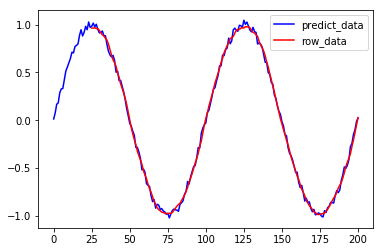

In [8]:
# 予測
predicted = model.predict(g) # (176, 25, 1) -> (176, 1) # t+1のデータを予測したものが176個。
print(g.shape, predicted.shape)

plt.figure()
plt.plot(range(0, len(f)), f, color="b", label="predict_data")
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="row_data")
plt.legend()
plt.show()

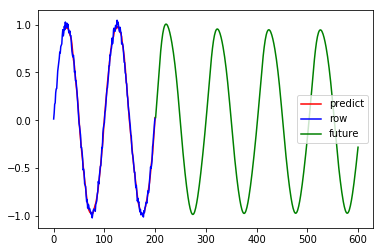

In [9]:

future_test = g[175].T

# 1つの学習データの時間の長さ -> 25
time_length = future_test.shape[1]
# 未来の予測データを保存していく変数
future_result = np.empty((0))


# 未来予想
for step2 in range(400):

    test_data = np.reshape(future_test, (1, time_length, 1))
    batch_predict = model.predict(test_data)

    future_test = np.delete(future_test, 0)
    future_test = np.append(future_test, batch_predict)

    future_result = np.append(future_result, batch_predict)


# sin波をプロット
plt.figure()
plt.plot(range(25,len(predicted)+25),predicted, color="r", label="predict")
plt.plot(range(0, len(f)), f, color="b", label="row")
plt.plot(range(0+len(f), len(future_result)+len(f)), future_result, color="g", label="future")
plt.legend()
plt.show()